In [2]:
from datetime import datetime
import pytz
from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_from_yahoo

# Set the simulation start and end dates
start = datetime(2014, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2014, 11, 1, 0, 0, 0, 0, pytz.utc)

# Load price data from yahoo.
data = load_from_yahoo(stocks=['AAPL'], indexes={}, start=start,
                       end=end)

AAPL


In [11]:
%matplotlib inline

AAPL


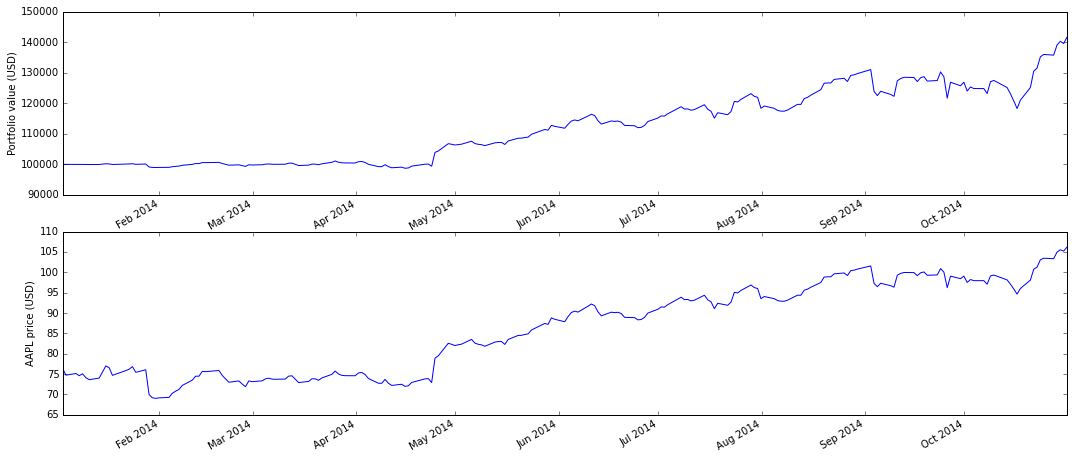

In [12]:
#!/usr/bin/env python
#
# Copyright 2014 Quantopian, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from zipline.api import order, record, symbol


def initialize(context):
    pass


def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)


# Note: this function can be removed if running
# this algorithm on quantopian.com
def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    # Plot the portfolio and asset data.
    ax1 = plt.subplot(211)
    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (USD)')
    ax2 = plt.subplot(212, sharex=ax1)
    results.AAPL.plot(ax=ax2)
    ax2.set_ylabel('AAPL price (USD)')

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()


# Note: this if-block should be removed if running
# this algorithm on quantopian.com
if __name__ == '__main__':
    from datetime import datetime
    import pytz
    from zipline.algorithm import TradingAlgorithm
    from zipline.utils.factory import load_from_yahoo

    # Set the simulation start and end dates
    start = datetime(2014, 1, 1, 0, 0, 0, 0, pytz.utc)
    end = datetime(2014, 11, 1, 0, 0, 0, 0, pytz.utc)

    # Load price data from yahoo.
    data = load_from_yahoo(stocks=['AAPL'], indexes={}, start=start,
                           end=end)

    # Create and run the algorithm.
    algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data,
                            identifiers=['AAPL'])
    results = algo.run(data)

    analyze(results=results)